In [1]:
import os
import numpy as np

from tensorflow.keras.layers import experimental
from keras.models import Sequential, Input
from keras.layers import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

In [2]:
images = [[],[]]
labels = [[],[]]
i = 0
for folder_name in ['train', 'valid']:
    folder_path = os.path.join('dataset', folder_name)
    for dataset_name in os.listdir(folder_path):
        dataset_path = os.path.join(folder_path, dataset_name)
        for file_name in os.listdir(dataset_path):
            file_path = os.path.join(dataset_path, file_name)
            img = load_img(file_path, color_mode='grayscale')
            images[i].append(np.array(img))
            labels[i].append(int(dataset_name))
    
    i += 1
    
train_images = np.array(images[0])
train_labels = np.array(labels[0])
validation_images = np.array(images[1])
validation_labels = np.array(labels[1])



(5400, 50, 50)
5


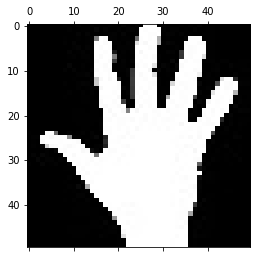

(1800, 50, 50)
3


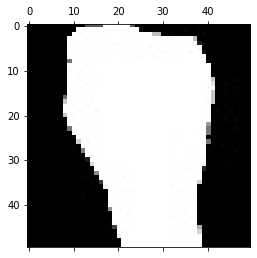

In [3]:
print(train_images.shape)
print(train_labels[5000])
plt.matshow(train_images[5000], cmap = 'gray')
plt.show()

print(validation_images.shape)
print(validation_labels[1000])
plt.matshow(validation_images[1000], cmap = 'gray')
plt.show()

In [4]:
train_images = train_images.reshape((5400, 50, 50, 1))
train_images = train_images.astype('float32')/255

validation_images = validation_images.reshape((1800, 50, 50, 1))
validation_images = validation_images.astype('float32')/255


print("Before:")
print(train_labels.shape)
print(train_labels[4000])

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)

print("After:")
print(train_labels.shape)
print(train_labels[4000])

Before:
(5400,)
4
After:
(5400, 6)
[0. 0. 0. 0. 1. 0.]


In [16]:
data_augmentation = Sequential()

data_augmentation.add(experimental.preprocessing.RandomFlip(mode = "horizontal"))
data_augmentation.add(experimental.preprocessing.RandomRotation(0.25))
data_augmentation.add(experimental.preprocessing.RandomTranslation(0.2,0.2))

model = Sequential()

model.add(Input((50,50,1)))
model.add(data_augmentation)

model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(units = 6, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [17]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 50, 50, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1296)             

In [18]:
history = model.fit(train_images, train_labels, epochs = 7, batch_size = 25, validation_data = (validation_images, validation_labels))

Epoch 1/7
216/216 [==============================] - 18s 69ms/step - loss: 0.9692 - accuracy: 0.5978 - val_loss: 0.1524 - val_accuracy: 0.9583
Epoch 2/7
216/216 [==============================] - 14s 66ms/step - loss: 0.3670 - accuracy: 0.8511 - val_loss: 0.0651 - val_accuracy: 0.9944
Epoch 3/7
216/216 [==============================] - 15s 68ms/step - loss: 0.2108 - accuracy: 0.9161 - val_loss: 0.0392 - val_accuracy: 0.9994
Epoch 4/7
216/216 [==============================] - 15s 68ms/step - loss: 0.1777 - accuracy: 0.9296 - val_loss: 0.0448 - val_accuracy: 0.9717
Epoch 5/7
216/216 [==============================] - 12s 57ms/step - loss: 0.1269 - accuracy: 0.9520 - val_loss: 0.0411 - val_accuracy: 0.9911
Epoch 6/7
216/216 [==============================] - 8s 36ms/step - loss: 0.1218 - accuracy: 0.9541 - val_loss: 0.0830 - val_accuracy: 0.9711
Epoch 7/7
216/216 [==============================] - 7s 34ms/step - loss: 0.1014 - accuracy: 0.9617 - val_loss: 0.0230 - val_accuracy: 1.0000


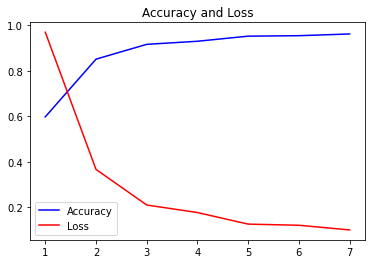

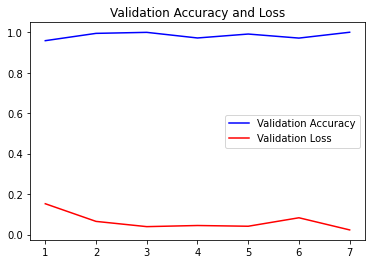

In [19]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Accuracy')
plt.plot(epochs, loss, 'r', label='Loss')
plt.title('Accuracy and Loss')
plt.legend()

plt.figure()
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Validation Accuracy and Loss')
plt.legend()

plt.show()

In [20]:
model.save('model.h5')